# Reinforcement Learning

# 1. Markov Decision Process

This notebook presents some examples of Markov Decison Processes, where an **agent** interacts with its **environment** and collects **rewards**.

In all considered models, rewards are attached to reached **states**. In games for instance, the reward of a state is +1 if you win, -1 if you loose, 0 in all other cases.

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import sys
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.listdir('gdrive/MyDrive/2024 - Projets de CODE /')
# Modifier la variable du TD en fonction de l'endroit où les données sont stockées
TD_DIR = 'gdrive/MyDrive/2024 - Projets de CODE /RL/TP1'
sys.path.append(TD_DIR)
os.path.exists(TD_DIR)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


True

In [ ]:
import numpy as np

In [ ]:
from model import Walk, Maze

Each model is an object of the class ``Environment`` storing the current state.

In [ ]:
from model import Environment

In [ ]:
methods_environment = [method for method in dir(Environment) if '__' not in method]

In [ ]:
methods_environment

['decode',
 'display',
 'encode',
 'get_actions',
 'get_all_actions',
 'get_all_states',
 'get_model',
 'get_reward',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reinit_state',
 'step']

The agent interacts with the environment and collects rewards.

In [ ]:
from agent import Agent

In [ ]:
methods_agent = [method for method in dir(Agent) if '__' not in method]

In [ ]:
methods_agent

['get_action',
 'get_actions',
 'get_episode',
 'get_gains',
 'one_step_policy',
 'random_policy']

## Walk

We start with a walk in a square. Some states (to be found) have positive rewards. Some wind (unknown) disturbs the walk.

In [ ]:
# environment
model = Walk()

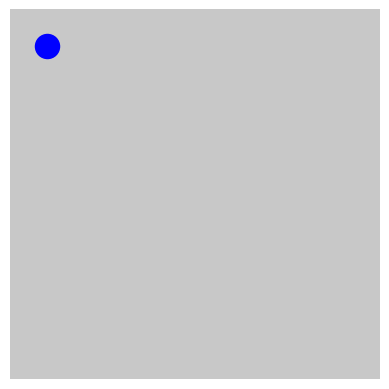

In [ ]:
model.display()

In [ ]:
model.Size

(5, 5)

In [ ]:
# rewards (to be discovered)
model.Rewards

{(1, 1): 1, (1, 3): -1, (3, 1): -1, (3, 3): 3}

In [ ]:
# wind (move probabilities)
model.Wind

{(0, 1): 0.75}

In [ ]:
state = model.state

In [ ]:
state

array([0, 0])

In [ ]:
model.get_actions(state)

[(0, 1), (1, 0)]

In [ ]:
action = (0, 1)

In [ ]:
model.step(action)

(0, False)

In [ ]:
model.state

array([0, 2])

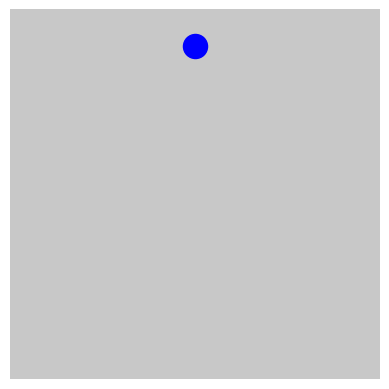

In [ ]:
model.display()

In [ ]:
# agent with random policy (default)
agent = Agent(model)

In [ ]:
state = model.state
action = agent.get_action(state)

In [ ]:
state

array([0, 2])

In [ ]:
action

(0, 1)

In [ ]:
# interaction with the environment
reward, stop = model.step(action)

In [ ]:
reward

0

In [ ]:
stop

False

In [ ]:
# all possible actions
agent.get_actions(state)

[(0, 1), (0, -1), (1, 0)]

In [ ]:
# policy of the agent
probs, actions = agent.policy(state)

In [ ]:
print(probs)

[0.33333333 0.33333333 0.33333333]


In [ ]:
print(actions)

[(0, 1), (0, -1), (1, 0)]


In [ ]:
# an episode
stop, states, rewards = agent.get_episode(horizon=50)

In [ ]:
# the episode includes the initial state
len(states)

51

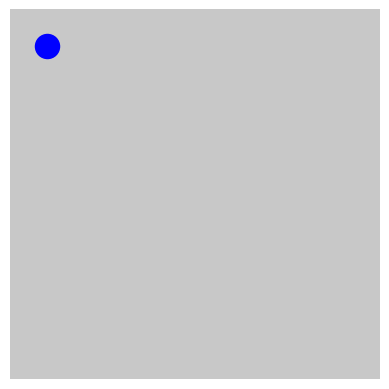

In [ ]:
# display
animation = model.display(states)

In [ ]:
animation

In [ ]:
# initial reward = 0 by convention
len(rewards)

51

In [ ]:
np.sum(rewards)

1

In [ ]:
# gains from initial state, with discount factor
gains = agent.get_gains(n_runs=10, horizon=100, gamma=0.9)

In [ ]:
np.mean(gains)

0.34456049766347696

## To do

* Test the weighted random policy where the probability of each move is proportional to its weight.
* Is this policy better than the (pure) random policy?

In [ ]:
weights = {(0, 1): 2, (1, 0): 2, (0, -1): 1, (-1, 0): 1}

In [ ]:
def weighted_random_policy(state, weights=weights):
    actions = Walk().get_actions(state)
    # to be modified
    probs = []
    return probs, actions

In [ ]:
# agent = Agent(model, policy=weighted_random_policy)

## Maze

Now let's try to escape a maze!

In [ ]:
os.listdir(TD_DIR)

['TP1_test.ipynb',
 'display.py',
 'maze.npy',
 'model.py',
 'agent.py',
 '__pycache__']

In [ ]:
maze_map = np.load(TD_DIR+'/maze.npy')

In [ ]:
init_state = (1, 0)
exit_state = (1, 20)
Maze.set_parameters(maze_map, init_state, [exit_state])

In [ ]:
model = Maze()

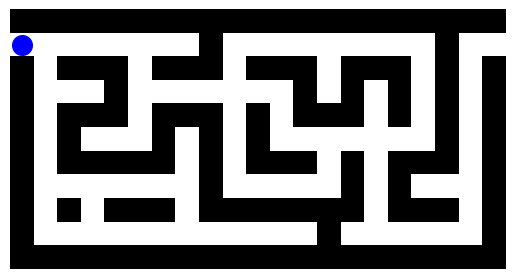

In [ ]:
model.display()

In [ ]:
model.state

array([1, 0])

In [ ]:
state = model.state
reward = model.get_reward(state)

In [ ]:
# -1 in any state except the exit
reward

-1

In [ ]:
model.get_actions(state)

[(0, 1)]

In [ ]:
action = (0, 1)

In [ ]:
model.step(action)

(-1, False)

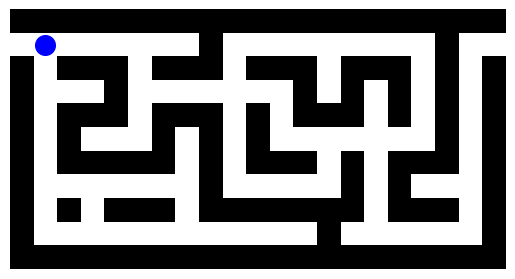

In [ ]:
model.display()

In [ ]:
# agent with random policy
agent = Agent(model)

In [ ]:
stop, states, rewards = agent.get_episode(horizon=200)

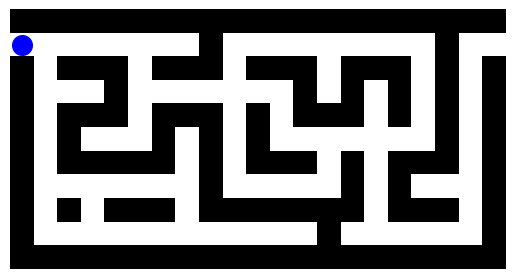

In [ ]:
animation = model.display(states)

In [ ]:
animation

In [ ]:
# time in the Maze
-np.sum(rewards)

201

## To do

* Test the weighted random policy.
* Which choice of the weights looks the best for this maze?

## Games

Finally, let's play games!<br>
Note that in most games:
* you play against an adversary (which is part of the environment),
* you may play first or second,
* when your adversary plays, you have only one possible action (let your adversary play),
* you can also impose an action to your adversary (useful for training).

We here consider [Tic-Tac-Toe](https://en.wikipedia.org/wiki/Tic-tac-toe), [Nim](https://en.wikipedia.org/wiki/Nim), [Connect Four](https://en.wikipedia.org/wiki/Connect_Four) and [Five in a row](https://en.wikipedia.org/wiki/Gomoku).
Feel free to add more :-)

In [ ]:
from model import TicTacToe, Nim, ConnectFour, FiveInRow

Each game is an object of the class ``Game``.

In [ ]:
from model import Game

In [ ]:
methods_game = [method for method in dir(Game) if '__' not in method]

In [ ]:
methods_game

['Board_Size',
 'decode',
 'display',
 'encode',
 'get_actions',
 'get_all_actions',
 'get_all_states',
 'get_available_actions',
 'get_model',
 'get_next_state',
 'get_reward',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reinit_state',
 'step']

The method ``get_next_state`` allows you to get the next state for any (state, action) pair, without modifying the current state. This will be useful to learn good policies.

The method ``get_available_actions`` gives the available actions, ignoring the player.

In [ ]:
set(methods_game) - set(methods_environment)

{'Board_Size', 'get_available_actions', 'get_next_state'}

## Tic-Tac-Toe

We start with Tic-Tac-Toe.

### Play first

In [ ]:
# game against a random player (default)
game = TicTacToe()

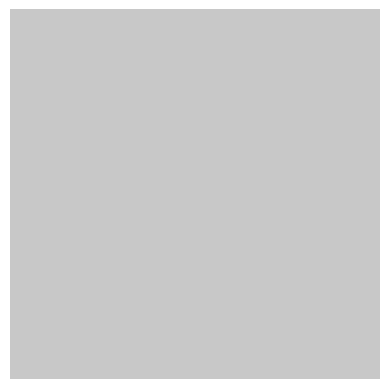

In [ ]:
game.display()

In [ ]:
# next player, board
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [ ]:
# your possible actions
game.get_actions(game.state)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [ ]:
# next state given some move
game.get_next_state(game.state, (1,1))

(-1,
 array([[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]]))

In [ ]:
# the state is not modified
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [ ]:
# you play at random (default)
agent = Agent(game)

In [ ]:
# you play as player 1 (default)
agent.player

1

In [ ]:
# your adversary plays as player -1
game.adversary.player

-1

In [ ]:
state = game.state
action = agent.get_action(state)

In [ ]:
action

(1, 1)

In [ ]:
reward, stop = game.step(action)

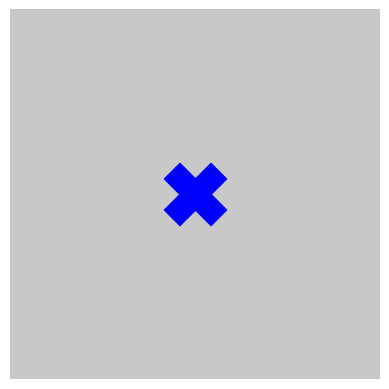

In [ ]:
# you're blue
game.display()

In [ ]:
game.state

(-1,
 array([[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]]))

In [ ]:
# all possible moves
game.get_actions(game.state)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]

In [ ]:
# your moves (not your turn)
agent.get_actions(game.state)

[None]

In [ ]:
action = agent.get_action(game.state)

In [ ]:
print(action)

None


In [ ]:
reward, stop = game.step(action)

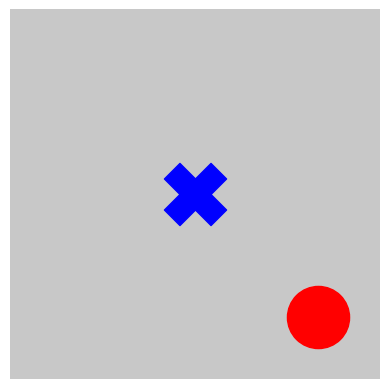

In [ ]:
game.display()

In [ ]:
stop, states, rewards = agent.get_episode()

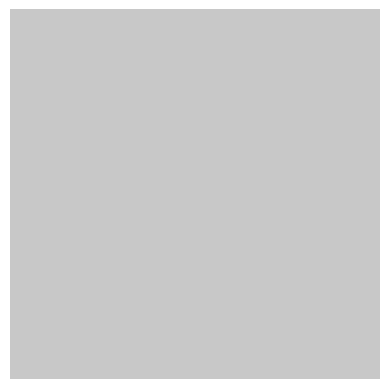

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([26, 16, 58]))

### Play second

In [ ]:
# your adversary starts
game = TicTacToe(play_first=False)

In [ ]:
game.first_player

-1

In [ ]:
# you still play at random
agent = Agent(game)

In [ ]:
stop, states, rewards = agent.get_episode()

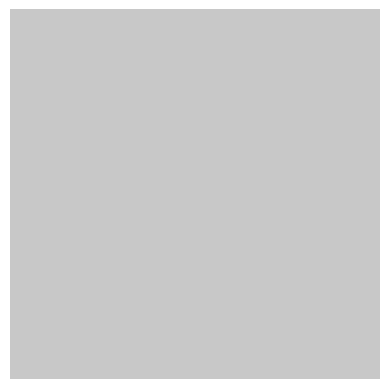

In [ ]:
animation = game.display(states)

In [ ]:
# you're still blue, red starts
animation

In [ ]:
rewards

[0, 0, 0, 0, 0, 0, 0, -1]

In [ ]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([56, 12, 32]))

### Control your adversary

You can force the actions of your adversary (useful for training).

In [ ]:
game = TicTacToe()

In [ ]:
actions = [(0, 0), (1, 1), (0, 2),  (2, 2), (0, 1)]

In [ ]:
for action in actions:
    game.step(action)

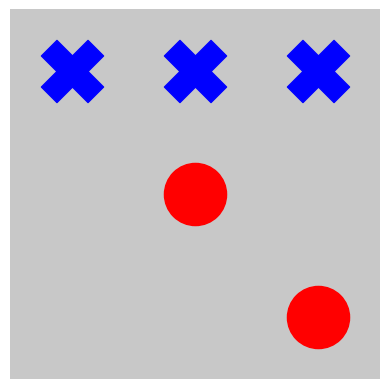

In [ ]:
game.display()

### One step ahead

In [ ]:
# your adversary is random
game = TicTacToe()

In [ ]:
# you play with one-step ahead policy
agent = Agent(game, policy='one_step')

In [ ]:
stop, states, rewards = agent.get_episode()

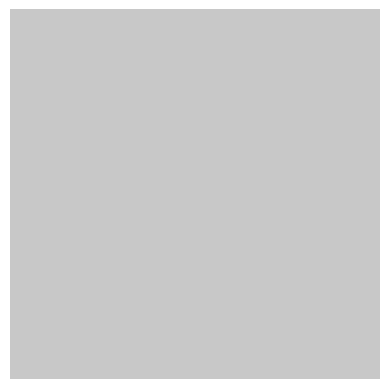

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([0, 1]), array([ 3, 97]))

In [ ]:
# your adversary also looks one-step ahead
game = TicTacToe(adversary_policy='one_step')

In [ ]:
agent = Agent(game, policy='one_step')

In [ ]:
stop, states, rewards = agent.get_episode()

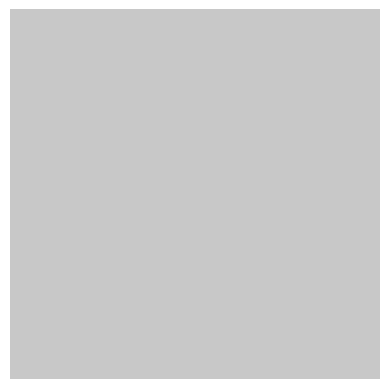

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([19, 53, 28]))

## Nim

### Random players

In [ ]:
# game against a random player (default)
game = Nim()

In [ ]:
game.state

(1, array([1, 3, 5, 7]))

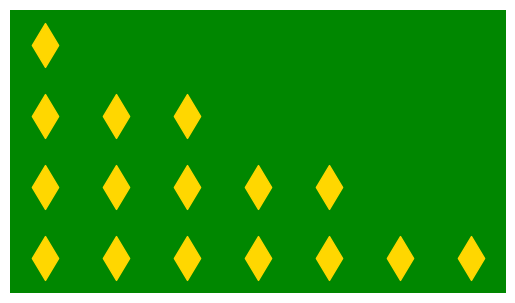

In [ ]:
game.display()

In [ ]:
# player, board
game.state

(1, array([1, 3, 5, 7]))

In [ ]:
# you play at random
agent = Agent(game)

In [ ]:
state = game.state
action = agent.get_action(state)

In [ ]:
action

(1, 1)

In [ ]:
reward, stop = game.step(action)

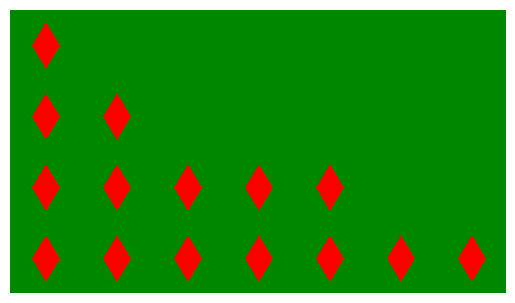

In [ ]:
game.display()

In [ ]:
stop, states, rewards = agent.get_episode()

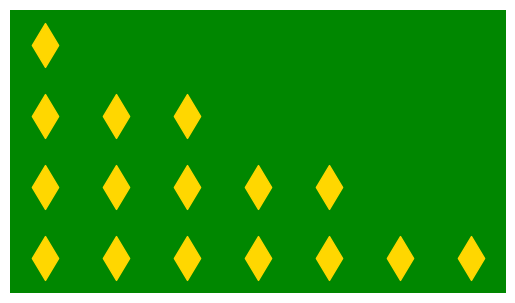

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
rewards

[0, 0, 0, 0, 0, 0, 0, -1]

In [ ]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  1]), array([51, 49]))

### One step ahead

In [ ]:
game = Nim(adversary_policy='one_step')

In [ ]:
agent = Agent(game, policy='one_step')

In [ ]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  1]), array([54, 46]))

## Connect Four

### Random players

In [ ]:
# game against a random player
game = ConnectFour()

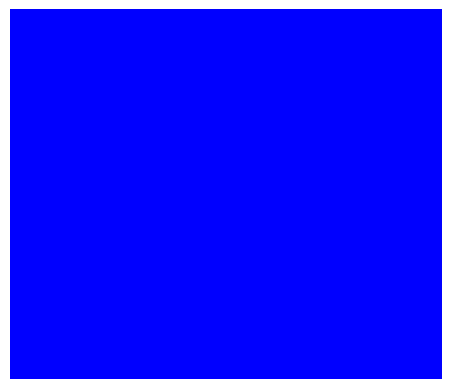

In [ ]:
game.display()

In [ ]:
game.state

(1,
 array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]))

In [ ]:
# you play at random
agent = Agent(game)

In [ ]:
stop, states, rewards = agent.get_episode()

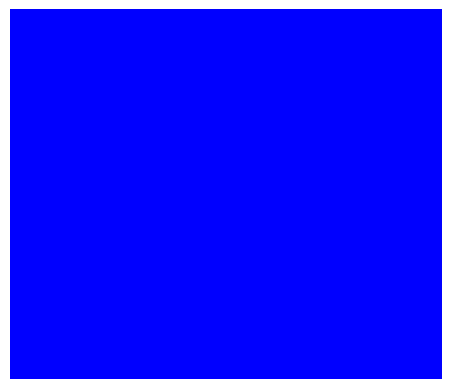

In [ ]:
animation = game.display(states)

In [ ]:
# you play yellow
animation

In [ ]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  1]), array([5, 5]))

### One step ahead

In [ ]:
game = ConnectFour(adversary_policy='one_step')

In [ ]:
agent = Agent(game, policy='one_step')

In [ ]:
stop, states, rewards = agent.get_episode()

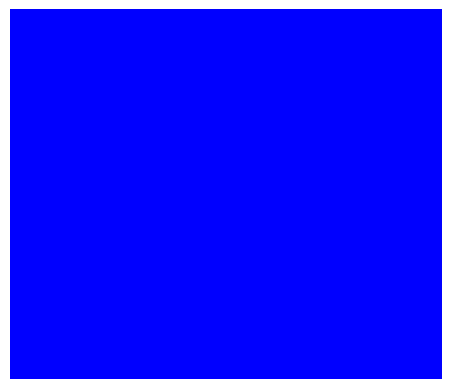

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  1]), array([5, 5]))

## Five-in-a-row

### Random players

In [ ]:
game = FiveInRow()

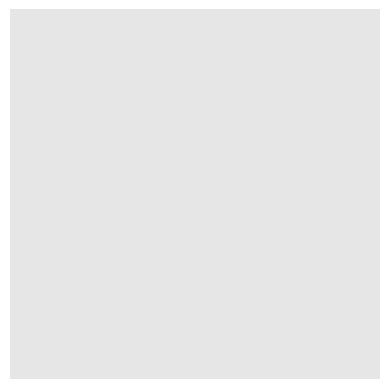

In [ ]:
game.display()

In [ ]:
agent = Agent(game)

In [ ]:
stop, states, rewards = agent.get_episode()

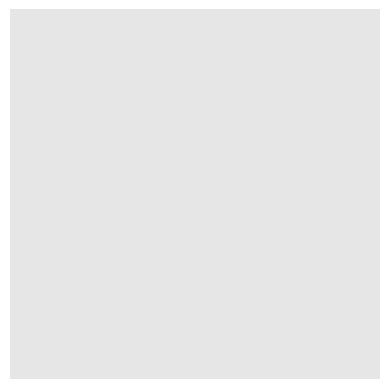

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  1]), array([5, 5]))

### One step ahead

In [ ]:
game = FiveInRow()

In [ ]:
agent = Agent(game, policy='one_step')

In [ ]:
np.unique(agent.get_gains(n_runs=5), return_counts=True)

(array([1]), array([5]))

In [ ]:
# a better adversary
game = FiveInRow(adversary_policy='one_step')

In [ ]:
agent = Agent(game, policy='one_step')

In [ ]:
np.unique(agent.get_gains(n_runs=5), return_counts=True)

(array([-1,  1]), array([2, 3]))

## Value function

The value function of a policy can be computed from Bellman's equation, provided the state space is not too large.

You can check this condition by listing all states.

In [ ]:
model = Walk()

In [ ]:
len(model.get_all_states())

25

## To do

* Complete the method ``evaluate_policy`` of the class ``PolicyEvaluation``.
* Evaluate the random policy in the ``Walk`` model and display the value function.
* Observe the impact of the wind on the value function.
* Display the value function of the random policy in the maze.

In [ ]:
# we use sparse transition matrices
from scipy import sparse

In [ ]:
class PolicyEvaluation:
    """Evaluation of a policy by Bellman's equation.

    Parameters
    ----------
    model: object of class Environment
        Model.
    policy: function
        Policy of the agent.
    player: int
        Player for games (1 or -1, default = default player of the game).
    gamma: float
        Discount factor (between 0 and 1).
    n_eval: int
        Number of iterations of Bellman's equation for policy evaluation.
    """
    def __init__(self, model, policy='random', player=None, gamma=1, n_eval=100):
        self.model = model
        agent = Agent(model, policy)
        self.policy = agent.policy
        if player is None:
            if model.is_game():
                self.player = model.player
            else:
                self.player = 1
        else:
            self.player = player
        self.gamma = gamma
        self.n_eval = n_eval
        self.index_states()
        self.get_rewards()
        self.actions = self.model.get_all_actions()
        self.get_transitions()

    def index_states(self):
        """Index all states."""
        self.states = self.model.get_all_states()
        self.n_states = len(self.states)
        self.state_id = {self.model.encode(state): i for i, state in enumerate(self.states)}

    def get_state_id(self, state):
        code = self.model.encode(state)
        return self.state_id[code]

    def get_rewards(self):
        """Get the reward of each state."""
        rewards = np.zeros(self.n_states)
        for i, state in enumerate(self.states):
            rewards[i] = self.model.get_reward(state)
        self.rewards = rewards

    def get_actions(self, state):
        actions = self.model.get_actions(state)
        return actions

    def get_transitions(self):
        """Get the transitions (probabilities to move from one state to another) for each action."""
        # for a given action, you dont know for sure which state you will reach based on perturbations
        transition = {action: sparse.lil_matrix((self.n_states, self.n_states)) for action in self.actions}
        for i, state in enumerate(self.states):
            actions = self.get_actions(state)
            for action in actions:
                try:
                    probs, next_states = self.model.get_transition(state, action)
                    indices = np.array([self.get_state_id(next_state) for next_state in next_states])
                    transition[action][i, indices] = np.array(probs)
                except:
                    print(state, actions, action)
        self.transition = {action: sparse.csr_matrix(transition[action]) for action in self.actions}

    def evaluate_policy(self):
        """Evaluate a policy by iteration of Bellman's equation."""
        transition = self.transition
        rewards = self.rewards
        # probability of each action over the states
        probs = {action: np.zeros(self.n_states) for action in self.actions}
        for state in self.states:
            i = self.get_state_id(state)
            for prob, action in zip(*self.policy(state)):
                probs[action][i] = prob
        # Bellman's equation
        values = np.zeros(self.n_states)
        for t in range(self.n_eval):
            new_values = np.zeros(self.n_states)
            for action in self.actions:
                # to be modified
                # Expectation(reward + gamma *value(next_state))
                new_values += probs[action] * transition[action].dot(rewards + self.gamma * values )
                #new_values += 0
            values = new_values.copy()
        self.values = values


In [ ]:
# value = 0
# for action in self.actions :
#   #value = r0 + gamma * value(next_state)
#   #for each possible actions we add that
#   i = self.get_state_id(state)
#   for j in range()
#   if new_state is accessible from (action,state):
#     proba = self.transition(i,j)
#     #ie for j such that self.transiction(i,j)!=0:
#     value += p(action) * ( (reward(new_state,action) + sum (proba(new_state |action, state) * gamma*value(new_state)) )


#     value += p(action) * (reward(action) + gamma * proba_transition|action dot value(next_state))

SyntaxError: expected ':' (<ipython-input-361-ef86e7a46466>, line 6)

In [ ]:
model = Walk()
agent = Agent(model)
random_policy = agent.policy

In [ ]:
algo = PolicyEvaluation(model, random_policy, gamma=0.9)

In [ ]:
algo.evaluate_policy()

In [ ]:
values = algo.values

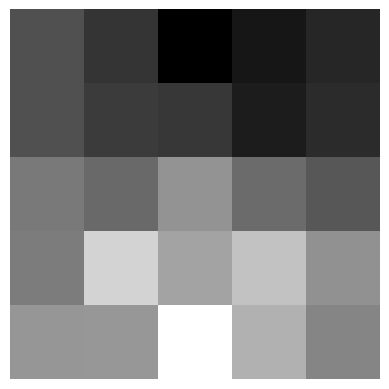

In [ ]:
model.display_values(values)

In [ ]:
wind = {(0, 1): 0.75}
Walk.set_parameters(Walk.Size, Walk.Rewards, wind)

In [ ]:
model = Walk()

## To do

* Evaluate the random policy and the one-step policy in some games, when possible.
* Do the same when the adversary plays with the one-step policy.
* Predict some first good moves for each of these game.

In [ ]:
Game = TicTacToe
game = Game()

In [ ]:
algo = PolicyEvaluation(game)

In [ ]:
values = algo.values
model.display_values(values)

AttributeError: 'PolicyEvaluation' object has no attribute 'values'